<a href="https://colab.research.google.com/github/glaubosclimaco/entregaveis/blob/main/Cenario_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64 


Possíveis outliers para Sales:


      Row ID        Order ID Order Date  ... Quantity Discount  Profit
1332  1333.0  CA-2014-122567 2014-02-16  ...      3.0      0.8 -1.7280
2106  2107.0  US-2014-152723 2014-09-26  ...      1.0      0.8 -1.4016
2761  2762.0  CA-2017-126536 2017-10-12  ...      1.0      0.0  0.4356
4101  4102.0  US-2017-102288 2017-06-19  ...      1.0      0.8 -1.1100
4711  4712.0  CA-2014-112403 2014-03-31  ...      1.0      0.7 -0.5964
7548  7549.0  CA-2014-103492 2014-10-10  ...      1.0      0.8 -1.5715
8024  8025.0  CA-2014-129189 2014-07-21  ...      1.0  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


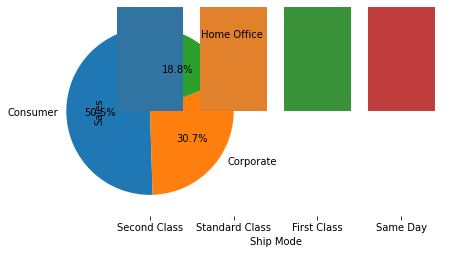

<Figure size 7200x7200 with 0 Axes>

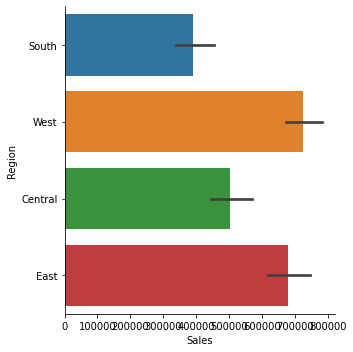

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

#lendo o arquivo e usando um parser para datas (para futuras analises)
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Cenário I/sample.xlsm',parse_dates=['Order Date','Ship Date'])


###
# LIMPEZA DOS DADOS 
###

# verificando quantidade de valores nulos
print(df.isnull().sum(),'\n')

# verificando quantos paises existem
#print(df.Country.unique(),'\n')

# qual o range dos anos?
# print(df['Order Date'].dt.year.unique())
# print(df['Ship Date'].dt.year.unique())
# print(df[df['Ship Date'].dt.year == 2018],'\n') ok


print("\nPossíveis outliers para Sales:\n\n")

q_low = df["Sales"].quantile(0.001)
q_hi  = df["Sales"].quantile(0.999)

df_filtered = df[(df["Sales"] < q_low)] 
print(df_filtered,'\n\n')
df_filtered = df[(df["Sales"] > q_hi)] 
print(df_filtered,'\n\n')


# print("\nPossíveis outliers para Quantity:\n\n")


# q_low = df["Quantity"].quantile(0.1)
# q_hi  = df["Quantity"].quantile(0.99)

# df_filtered = df[(df["Quantity"] < q_low)] 
# print(df_filtered,'\n\n')
# df_filtered = df[(df["Quantity"] > q_hi)] 
# print(df_filtered,'\n\n')

print("\nPossíveis outliers para Profit:\n\n")

q_low = df["Profit"].quantile(0.001)
q_hi  = df["Profit"].quantile(0.999)

df_filtered = df[(df["Profit"] < q_low)] 
print(df_filtered,'\n\n')
df_filtered = df[(df["Profit"] > q_hi)] 
print(df_filtered,'\n\n')



# Correlacao entre as colunas
print('Correlacao entre as colunas:\n')
print(df.corr())

# Descricao dos dados
print("\nEstatística descritiva:\n")
print(df.describe())

print('\n\n**Análise exploratória:**\n\n')

print('Valor das vendas por região: \n')
print(df.groupby("Region").Sales.sum(),'\n')


print('\n10 produtos mais vendidos:\n')
print(df.groupby("Product Name").Sales.sum().sort_values(ascending=False).head(10),'\n\n')


print('\n10 produtos mais lucrativos:\n')
print(df.groupby("Product Name").Profit.sum().sort_values(ascending=False).head(10),'\n\n')

print('\nCategorias mais lucrativas:\n')
print(df.groupby("Category").Profit.sum(),'\n\n')

print('\Vendas por segmento:')
pie_data = (df.groupby('Segment')['Sales'].sum()).to_frame()
pie_data['Percent_Sale'] = round((pie_data.Sales/sum(pie_data.Sales))*100)
plt.pie(pie_data.Percent_Sale, labels=pie_data.index,  startangle=90, autopct='%.1f%%');plt.show

print('\nSales por Ship Mode: \n')
sns.barplot('Ship Mode','Sales',data=df,estimator=sum)

#vendas por meses
plt.figure(figsize=(100,100))
sns.catplot(y = 'Region',x = 'Sales',data=df,kind='bar',estimator=sum)
plt.show()
